In [225]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from newsapi import NewsApiClient
from datetime import datetime, timedelta
import numpy as np
from numpy.random import seed
seed(1)
import requests
from tensorflow import random
random.set_seed(2)
import hvplot.pandas
%matplotlib inline

In [226]:
load_dotenv()

True

In [227]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")
#print(alpaca_api_key)

In [228]:
#15Min interval
timeframe = "1D"
start_date = pd.Timestamp("2017-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-12-31", tz="America/New_York").isoformat()
#today = pd.Timestamp("2021-01-02", tz="America/New_York").isoformat()
ticker = ["PYPL", "SQ", "AFRM", "MELI"]
fintech_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
fintech_ticker.dropna(inplace=True)
fintech_ticker.head(5)
#apple_ticker.dropna(inplace=True)

AFRM                                        \
                              open     high     low    close      volume   
time                                                                       
2021-01-13 00:00:00-05:00   90.900  103.000   90.01   97.010  24984325.0   
2021-01-14 00:00:00-05:00  103.500  137.980  101.00  114.400  20358777.0   
2021-01-15 00:00:00-05:00  123.054  127.240  107.00  116.700   8033257.0   
2021-01-19 00:00:00-05:00  117.000  117.675  108.00  110.875   3116358.0   
2021-01-20 00:00:00-05:00  110.000  112.000  103.25  107.150   3504314.0   

                              MELI                                           \
                              open       high       low     close    volume   
time                                                                          
2021-01-13 00:00:00-05:00  1823.00  1830.0000  1766.685  1797.165  453625.0   
2021-01-14 00:00:00-05:00  1814.00  1889.6200  1814.000  1852.520  491020.0   
2021-01-15 00:00:00-05:00  1860.01  1877.1091  1805.460  1856.340  478130.0   
2021-01-19 00:00:00-05:00  1888.17  1938.1699  1861.000  1915.700  590186.0   
2021-01-20 00:00:00-05:00  1960.00  1991.8800  1929.520  1986.000  574762.0   

                             PYPL                                         \
                             open      high       low   close     volume   
time                                                                       
2021-01-13 00:00:00-05:00  236.57  247.4400  236.5400  244.90  6419870.0   
2021-01-14 00:00:00-05:00  246.87  249.8500  241.5400  242.01  5757075.0   
2021-01-15 00:00:00-05:00  242.25  244.5632  235.0341  239.79  6600442.0   
2021-01-19 00:00:00-05:00  243.30  248.7400  241.0000  247.24  5690793.0   
2021-01-20 00:00:00-05:00  248.85  249.6500  244.1400  244.19  5068278.0   

                               SQ                                        
                             open      high     low   close      volume  
time                                                                     
2021-01-13 00:00:00-05:00  228.95  234.8213  226.80  230.94  14553101.0  
2021-01-14 00:00:00-05:00  233.90  238.7600  229.59  232.71   6502923.0  
2021-01-15 00:00:00-05:00  233.63  236.4300  225.58  227.65   6344926.0  
2021-01-19 00:00:00-05:00  231.07  231.5900  223.25  227.25   6347656.0  
2021-01-20 00:00:00-05:00  230.12  230.8800  225.50  226.65   5379761.0

In [229]:
fintech_df = pd.DataFrame()
fintech_df["PayPal"] = fintech_ticker["PYPL"]["close"]
fintech_df["Square"] = fintech_ticker["SQ"]["close"]
fintech_df["Affirm"] = fintech_ticker["AFRM"]["close"]
fintech_df["Mercalibre"] = fintech_ticker["MELI"]["close"]
#fintech_df["Johnson&Johnson"] = nasdaq_ticker["JNJ"]["close"]
#apple_df = apple_df.pct_change().dropna()
fintech_df.index = fintech_df.index.date 
fintech_df.dropna(inplace=True)
fintech_df.head()

,PayPal,Square,Affirm,Mercalibre
2021-01-13,244.90,230.94,97.010,1797.165
2021-01-14,242.01,232.71,114.400,1852.520
2021-01-15,239.79,227.65,116.700,1856.340
2021-01-19,247.24,227.25,110.875,1915.700
2021-01-20,244.19,226.65,107.150,1986.000


In [230]:
#fintech_returns = fintech_df.pct_change().dropna()
#fintech_returns.head()

In [231]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [232]:
window_size = 10
feature_column = 2
target_column = 2
X, y = window_data(fintech_df, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:5]} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[[ 97.01  114.4   116.7   110.875 107.15  108.99  120.86  112.6   110.
  105.29 ]
 [114.4   116.7   110.875 107.15  108.99  120.86  112.6   110.    105.29
   99.44 ]
 [116.7   110.875 107.15  108.99  120.86  112.6   110.    105.29   99.44
   99.59 ]
 [110.875 107.15  108.99  120.86  112.6   110.    105.29   99.44   99.59
  107.6  ]
 [107.15  108.99  120.86  112.6   110.    105.29   99.44   99.59  107.6
  112.95 ]] 

y sample values:
[[ 99.44]
 [ 99.59]
 [107.6 ]
 [112.95]
 [110.88]]


In [233]:
print(X)

[[ 97.01  114.4   116.7   ... 112.6   110.    105.29 ]
 [114.4   116.7   110.875 ... 110.    105.29   99.44 ]
 [116.7   110.875 107.15  ... 105.29   99.44   99.59 ]
 ...
 [ 56.31   64.68   66.75  ...  65.56   68.5    67.505]
 [ 64.68   66.75   68.18  ...  68.5    67.505  65.95 ]
 [ 66.75   68.18   67.12  ...  67.505  65.95   63.58 ]]


In [234]:
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split :]
y_train = y[: split]
y_test = y[split :]

In [235]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [236]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[0.5321663 ]
  [0.72242888]
  [0.747593  ]
  [0.68386214]
  [0.64310722]
  [0.66323851]
  [0.79310722]
  [0.70273523]
  [0.67428884]
  [0.62275711]]

 [[0.72242888]
  [0.747593  ]
  [0.68386214]
  [0.64310722]
  [0.66323851]
  [0.79310722]
  [0.70273523]
  [0.67428884]
  [0.62275711]
  [0.55875274]]

 [[0.747593  ]
  [0.68386214]
  [0.64310722]
  [0.66323851]
  [0.79310722]
  [0.70273523]
  [0.67428884]
  [0.62275711]
  [0.55875274]
  [0.56039387]]

 [[0.68386214]
  [0.64310722]
  [0.66323851]
  [0.79310722]
  [0.70273523]
  [0.67428884]
  [0.62275711]
  [0.55875274]
  [0.56039387]
  [0.64803063]]

 [[0.64310722]
  [0.66323851]
  [0.79310722]
  [0.70273523]
  [0.67428884]
  [0.62275711]
  [0.55875274]
  [0.56039387]
  [0.64803063]
  [0.70656455]]] 

X_test sample values:
[[[0.12275711]
  [0.12188184]
  [0.15459519]
  [0.13034902]
  [0.1663151 ]
  [0.21455142]
  [0.22571116]
  [0.20667396]
  [0.2083151 ]
  [0.22954048]]

 [[0.12188184]
  [0.15459519]
  [0.130349

In [237]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [238]:
model = Sequential()

#Adding number_units to the architecture enables the model to far more accurate that with a single digit number
number_units = 20
dropout_fraction = 0.2


# Layer 1
model.add(LSTM(units=number_units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [239]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [240]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 10, 20)            1760      
_________________________________________________________________
dropout_30 (Dropout)         (None, 10, 20)            0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 10, 20)            3280      
_________________________________________________________________
dropout_31 (Dropout)         (None, 10, 20)            0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 20)                3280      
_________________________________________________________________
dropout_32 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)               

In [241]:
model.fit(X_train, y_train, epochs=20, shuffle=False, batch_size=1, verbose=1)

Epoch 1/20
98/98 [==============================] - 5s 5ms/step - loss: 0.0737
Epoch 2/20
98/98 [==============================] - 0s 5ms/step - loss: 0.0344
Epoch 3/20
98/98 [==============================] - 0s 5ms/step - loss: 0.0385
Epoch 4/20
98/98 [==============================] - 0s 5ms/step - loss: 0.0299
Epoch 5/20
98/98 [==============================] - 1s 5ms/step - loss: 0.0332
Epoch 6/20
98/98 [==============================] - 0s 5ms/step - loss: 0.0343
Epoch 7/20
98/98 [==============================] - 0s 5ms/step - loss: 0.0294
Epoch 8/20
98/98 [==============================] - 0s 5ms/step - loss: 0.0288
Epoch 9/20
98/98 [==============================] - 0s 5ms/step - loss: 0.0294
Epoch 10/20
98/98 [==============================] - 0s 5ms/step - loss: 0.0310
Epoch 11/20
98/98 [==============================] - 0s 5ms/step - loss: 0.0285
Epoch 12/20
98/98 [==============================] - 0s 5ms/step - loss: 0.0285
Epoch 13/20
98/98 [==============================

In [242]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 4ms/step - loss: 0.0016


0.0016050798585638404

In [243]:
predicted = model.predict(X_test)

In [244]:
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [245]:
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = fintech_df.index[-len(real_prices): ])
stocks.head(10)

,Real,Predicted
2021-06-18,68.18,63.688782
2021-06-21,63.78,64.204895
2021-06-22,63.44,64.452530
2021-06-23,65.16,64.401649
2021-06-24,66.26,64.279388
2021-06-25,64.25,64.115387
2021-06-28,64.40,63.878204
2021-06-29,66.46,63.645298
2021-06-30,67.35,63.538994
2021-07-01,68.29,63.553806


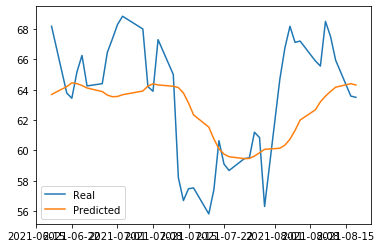

In [246]:
stocks.plot()#(label = "Predicting Apple's Close with the S&P500 Close - (6Day Window)", xlabel="Date", ylabel="Price")